<a href="https://colab.research.google.com/github/aman3002/ml-practicals/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sy
data=[[3,1,-1],[3,-1,1],[6,1,1],[6,-1,1],[1,0,-1],[0,1,-1],[0,-1,-1],[-1,0,-1]]

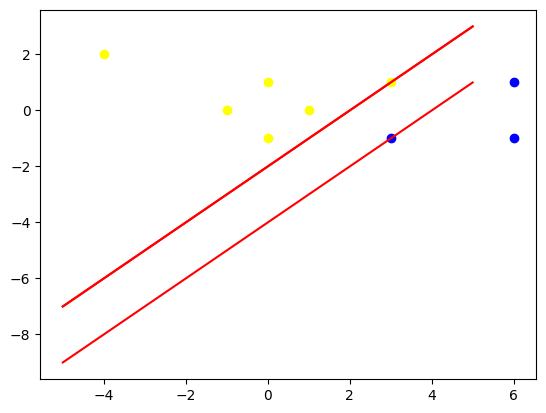

In [73]:

posetive,negative=[],[]
for i in data:
  if(i[2]==1):
    posetive.append(i[:2])
  else:
    negative.append(i[:2])
#eucledian solver
def eucledian(a,b):
  z=math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
  return z
support=[[1,0,1],[3,1,1],[3,-1,1]]
#equation solver
def eqution(support,posetive,negative):
  s=[]
  for i in range(len(support)):
    for j in range(len(support)):
      s.append(np.dot(support[i],support[j]))
  z=[]
  for i in range(0,len(s),3):
    z.append(s[i:i+3])
  a=[-1,1,1]
  z=np.array(z)
  a=np.array(a)
  x=np.linalg.solve(z,a)
  d=x[0]*np.array(support[0])+x[1]*np.array(support[1])+x[2]*np.array(support[2])
  w1=d[:-1]
  b=d[-1]
  #equation of hyperplane
  x1=-b/w1[0]
  t=[]
  for i in posetive:
    t.append(eucledian([x1,w1[0]],i[:2]))
  p=[]
  for i in negative:
    p.append(eucledian([x1,w1[0]],i[:2]))
  f=t.index(min(t))
  g=p.index(min(p))
  f=posetive[f][:2]
  g=negative[g][0:2]  
  return f,g,[x1,w1[1]],[w1[0],w1[1],b]

#classification function

def classify(point,support,posetive,negative):
  a,b,c,d=eqution(support,posetive,negative)
  z=float(d[0]*point[0])+float(d[1]*point[1])+float(d[2])
  if(z>0):
    posetive.append(point)
  elif(z<0):
    negative.append(point)
  return posetive,negative

# main function
a,b,c,d=eqution(support,posetive,negative)


#equation maker

m=np.linspace(-5,5,10)
y=a[1]-a[0]+m
j=b[1]-b[0]+m
k=c[1]-c[0]+m

#classifying a point
posetive,negative=classify([-4,2],support,posetive,negative)
for i in posetive:
  plt.scatter(i[0],i[1],color="blue")
for i in negative:
  plt.scatter(i[0],i[1],color="yellow")

#plotting a graph


plt.plot(m,j,color="red")
plt.plot(m,y,color="red")
plt.plot(m,k,color="red")
plt.show()

